# **Project : Cell image segmentation projects**
Team (Alphabetical order): Arvin Jafari, Reza Ghahremani, Delnavaz Fotouhi

University: Università degli Studi di Milano


## **Loading Data**


In [2]:
!pip install --upgrade kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=ec6fad1f9e73ebbd4ef0cab0c2ffe07367a27477516c63a1d880bcd48dd4df00
  Stored in directory: /root/.cache/pip/wheels/d7/54/06/8a8f40cb39536605feb9acaacd0237a95eba39e5065e6392f4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.12
    Uninstalling kaggle-1.6.12:
      Successfully uninstalled kaggle-1.6.12


In [1]:
import os
import shutil

# Step 1: Verify ~/.kaggle directory exists
kaggle_dir = os.path.expanduser('~/.kaggle')
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
    print("Directory created: ~/.kaggle")
else:
    print("Directory already exists: ~/.kaggle")

# Step 2: Copy kaggle.json to ~/.kaggle directory
kaggle_json_path = 'kaggle.json'  # Update this path if necessary
target_path = os.path.join(kaggle_dir, 'kaggle.json')

if os.path.exists(kaggle_json_path):
    shutil.copy(kaggle_json_path, target_path)
    os.chmod(target_path, 0o600)
    print("kaggle.json has been copied to ~/.kaggle and permissions set.")
else:
    print("kaggle.json not found in the current directory.")

Directory created: ~/.kaggle
kaggle.json has been copied to ~/.kaggle and permissions set.


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "rezaghahremani99"
os.environ['KAGGLE_KEY'] = "2de77e019555e21f9e3cf41417a6d919"

In [4]:
!kaggle competitions download -c data-science-bowl-2018

 99% 353M/358M [00:03<00:00, 99.8MB/s]
100% 358M/358M [00:03<00:00, 95.6MB/s]


In [5]:
! unzip data-science-bowl-2018.zip -d data

Archive:  data-science-bowl-2018.zip
  inflating: data/stage1_sample_submission.csv.zip  
  inflating: data/stage1_solution.csv.zip  
  inflating: data/stage1_test.zip    
  inflating: data/stage1_train.zip   
  inflating: data/stage1_train_labels.csv.zip  
  inflating: data/stage2_sample_submission_final.csv.zip  
  inflating: data/stage2_test_final.zip  


In [6]:
cd data

/content/data


In [7]:
!for file in *.zip; do unzip -q "$file" -d "${file%%.*}" && rm "$file"; done

In [8]:
ls

stage1_sample_submission/  stage1_test/   stage1_train_labels/             stage2_test_final/
stage1_solution/           stage1_train/  stage2_sample_submission_final/


In [9]:
import os
import shutil
import random

# Define the source directory
source_dir = "stage1_train/"

# Define the destination directory
dest_dir = "toy_data/"

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Get a list of all folders in the source directory
folders = os.listdir(source_dir)

# Randomly select 50 folders
selected_folders = random.sample(folders, 50)

# Copy selected folders to the destination directory
for folder in selected_folders:
    src = os.path.join(source_dir, folder)
    dst = os.path.join(dest_dir, folder)
    shutil.copytree(src, dst)

print("Selected folders have been copied to the 'toy_data' folder.")

Selected folders have been copied to the 'toy_data' folder.


In [10]:
cd toy_data/

/content/data/toy_data


In [11]:
ls

0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0/
16c3d5935ba94b720becc24b7a05741c26149e221e3401924080f41e2f891368/
19f0653c33982a416feed56e5d1ce6849fd83314fd19dfa1c5b23c6b66e9868a/
1f9e429c12f4477221b5b855a5f494fda2ef6d064ff75b061ffaf093e91758c5/
2255d5aba044256bb92f6b7cbed0fca46d972c7b6b1a59dcbe7f682c5777d074/
317832f90f02c5e916b2ac0f3bcb8da9928d8e400b747b2c68e544e56adacf6b/
319b6cb8b0d24b38db5e3c6fbb13b062e2766d9af5ff9bccb8f439ac0d870e52/
337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf/
33d0a9b24c25852ce35274b4b1777484ccd21f44dbe35491cc926e5948c1ce3e/
4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a/
44ab6a09eedee848b072ea3acd0f4e781f9c43b8d4e3d62598e1024584bf0b01/
45f059cf21d85ecfce0eb93260516f1e2443d210e9a52f9ae2271d604aa3fcc5/
4bf6a5ec42032bb8dbbb10d25fdc5211b2fe1ce44b6e577ef89dbda17697d819/
4cbd6c37f3a55a538d759d440344c287cac66260d3047a83f429e63e7a0f7f20/
4e1c889de3764694d0dea41e5682fedb265eaf2cdbe72ff6c1f518747d709464/
50a7ea80dd

## **Extract a sample**

In [12]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def stretch_contrast(image):
    """
    Stretch the contrast of an image to utilize the full range of pixel values (0 to 255).

    Args:
    - image (numpy array): Input image represented as a numpy array.

    Returns:
    - stretched_image (numpy array): Image with contrast stretched to utilize the full range of pixel values.
    """
    # Compute the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Stretch the contrast using linear scaling
    stretched_image = (image - min_val) * (255.0 / (max_val - min_val))
    return stretched_image.astype(np.uint8)

def load_data(base_path):
    images = []
    masks = []
    sample_names = []

    sample_folders = [os.path.join(base_path, folder) for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

    for sample_folder in sample_folders:
        sample_name = os.path.basename(sample_folder)
        image_path = os.path.join(sample_folder, 'images', f'{sample_name}.png')
        masks_path = os.path.join(sample_folder, 'masks')

        # Load the image and stretch contrast
        image = Image.open(image_path)
        image = np.array(image)
        stretched_image = stretch_contrast(image)
        images.append(stretched_image)
        sample_names.append(sample_name)

        # Load all masks for this sample
        mask_files = [os.path.join(masks_path, mask_file) for mask_file in os.listdir(masks_path) if mask_file.endswith('.png')]
        sample_masks = [np.array(Image.open(mask_file).convert('L')) for mask_file in mask_files]
        masks.append(sample_masks)

    return images, masks, sample_names

First sample name: 76c4f14e35210f87a29e93c46dbb25c8f5dc5c04d1d3134672708bcdfbc7e959


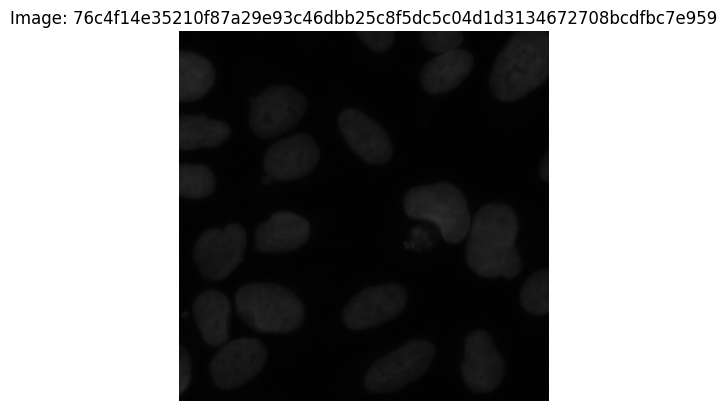

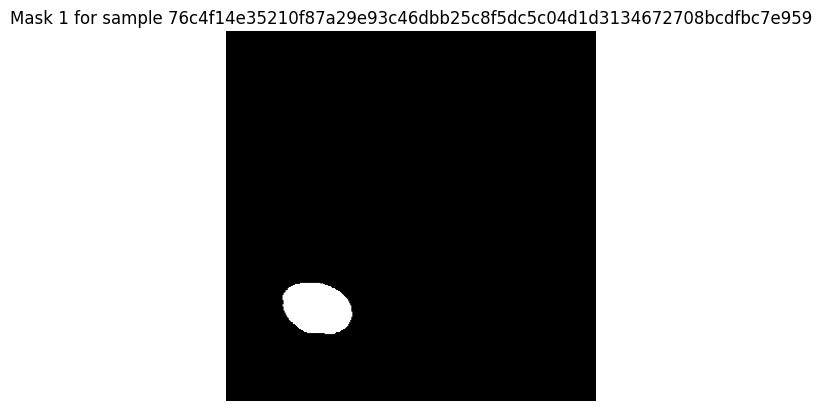

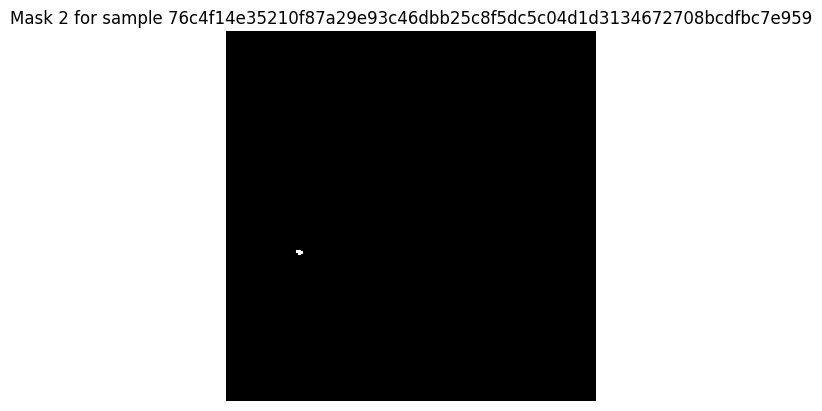

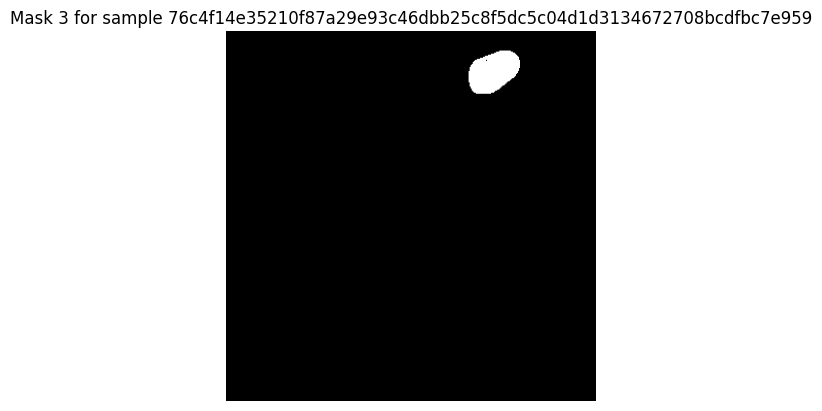

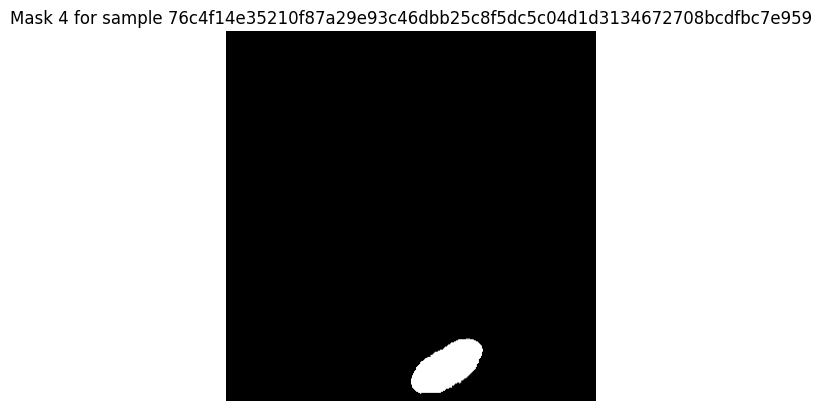

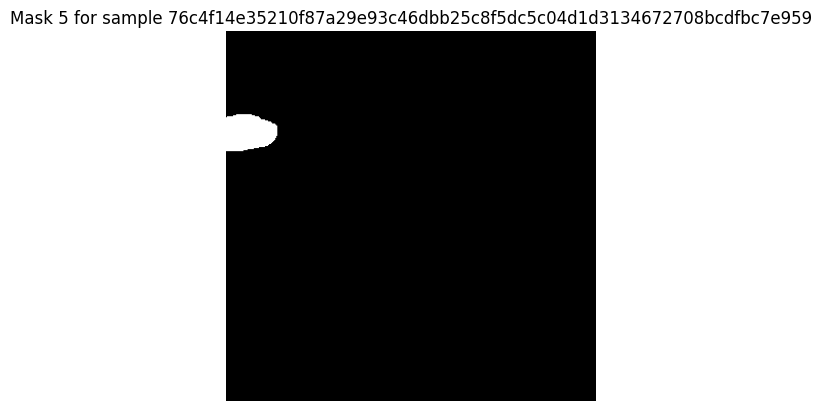

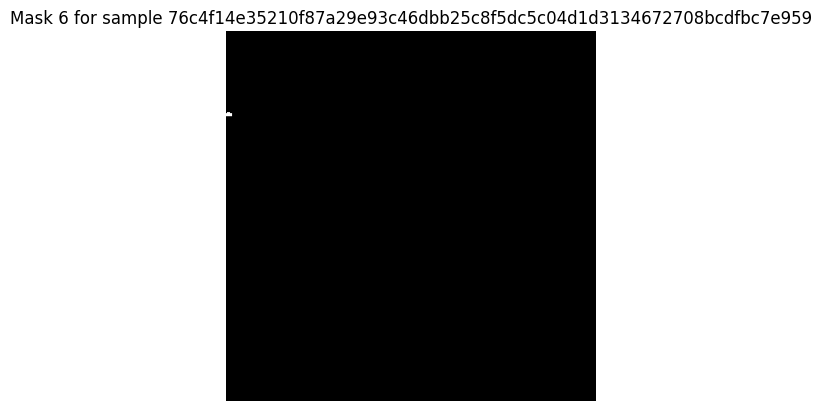

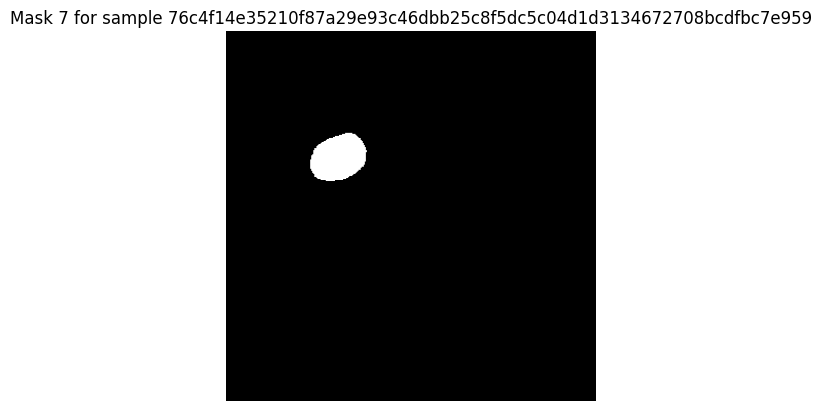

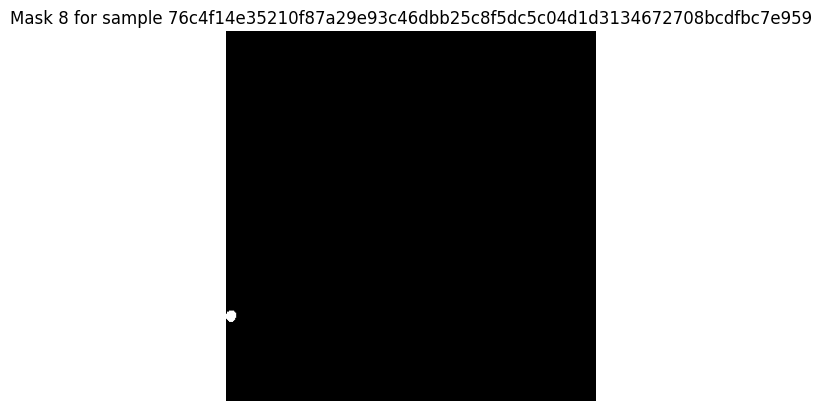

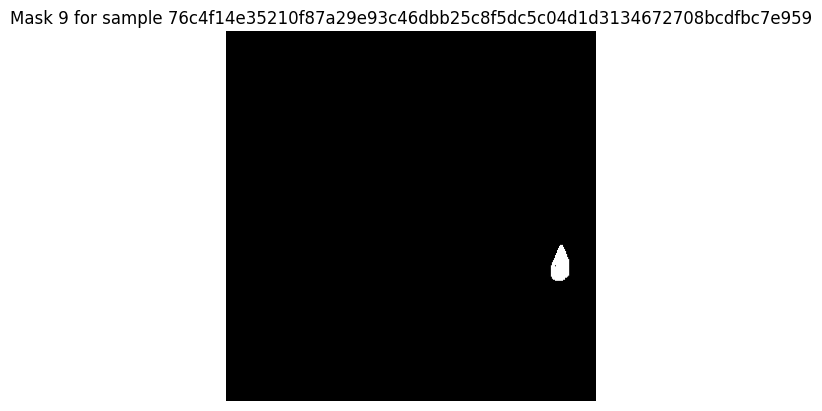

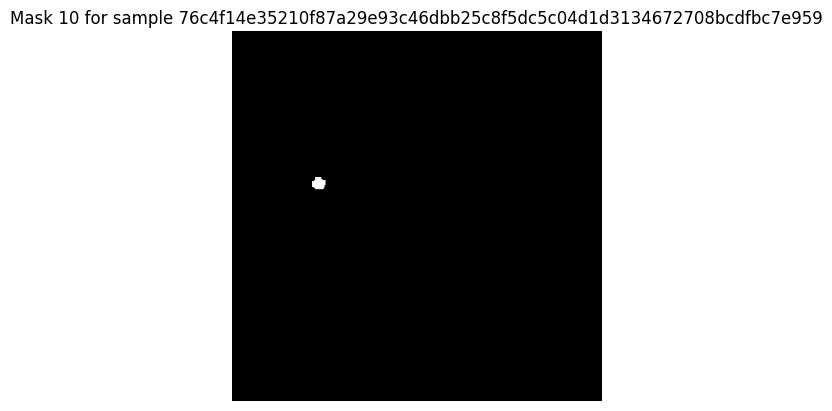

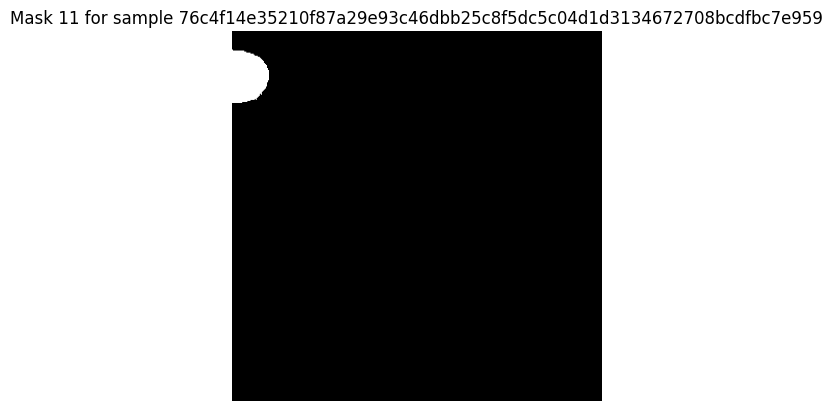

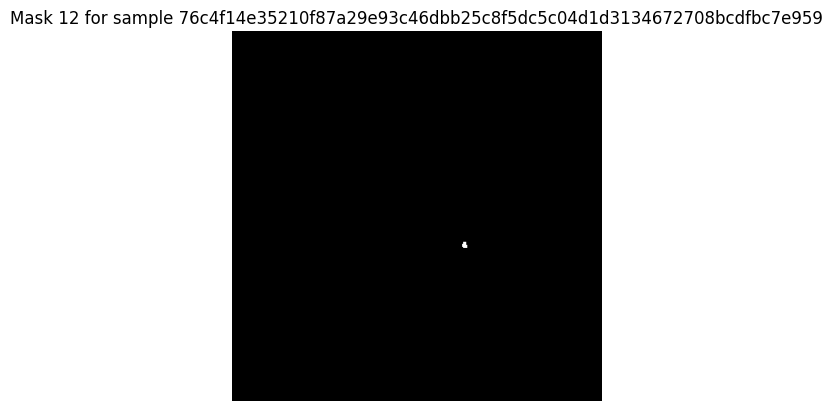

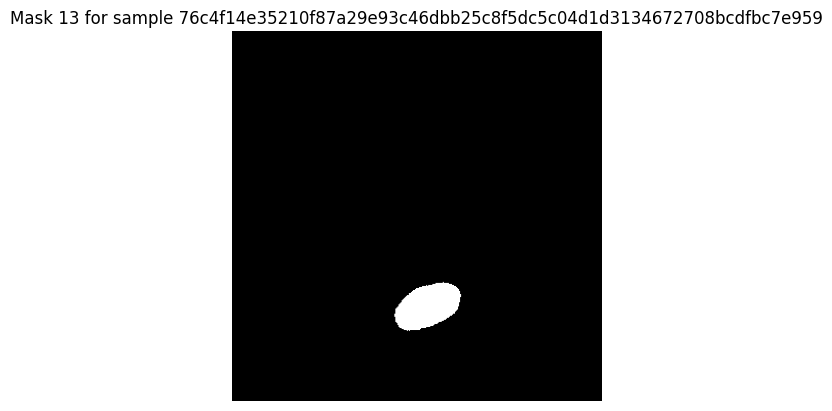

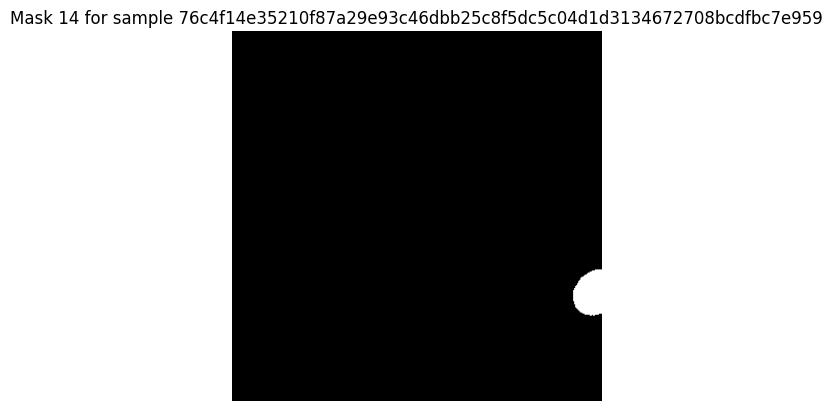

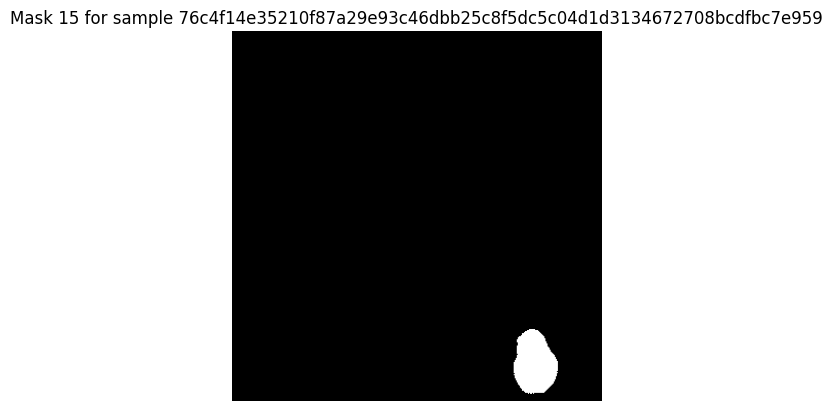

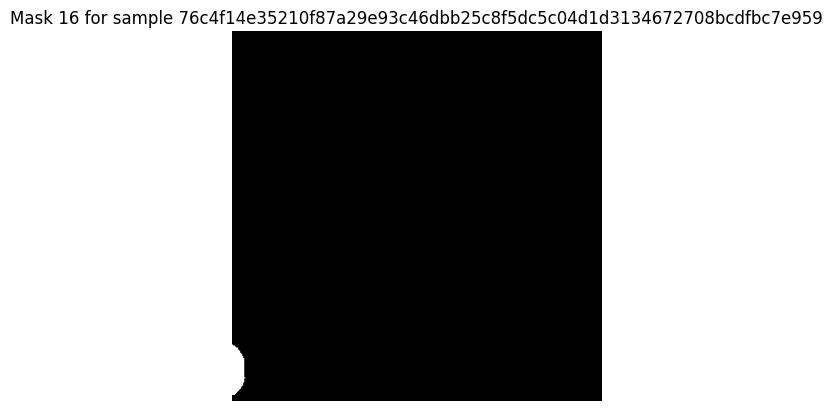

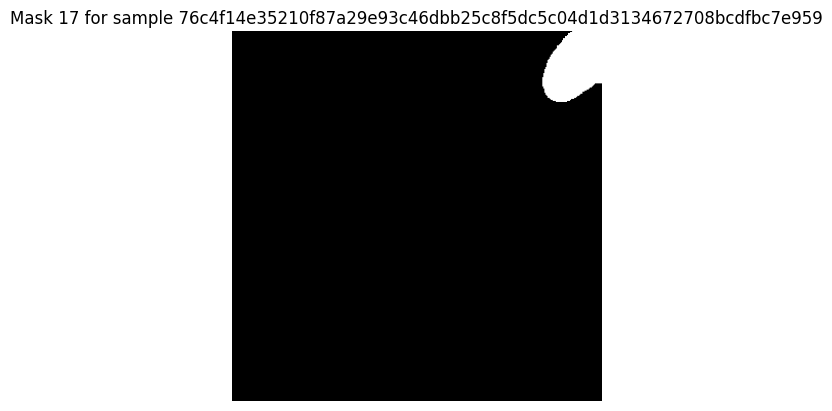

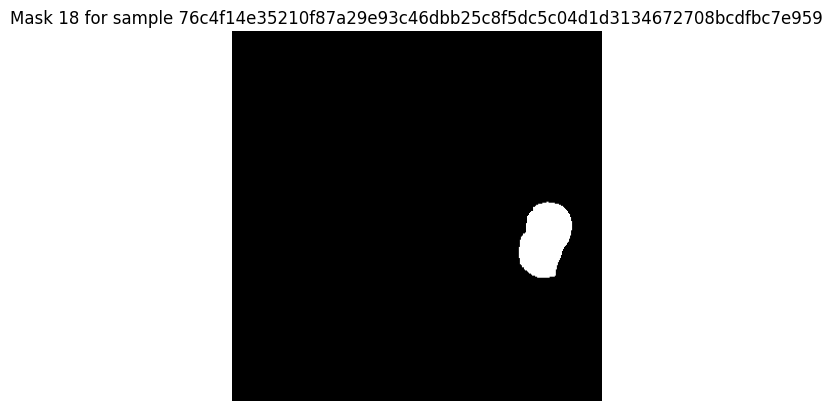

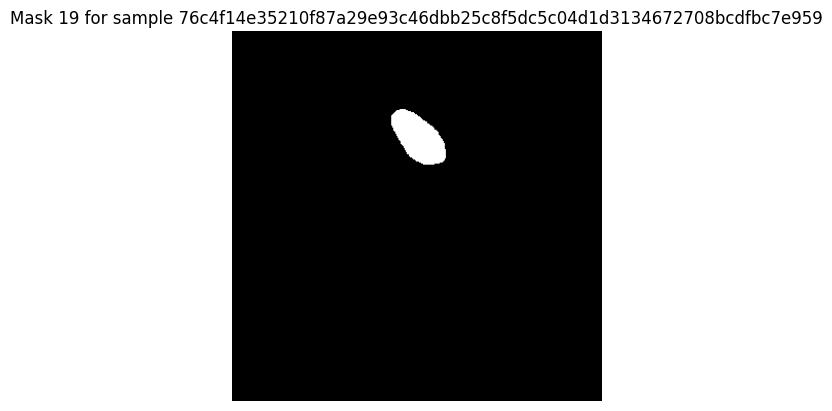

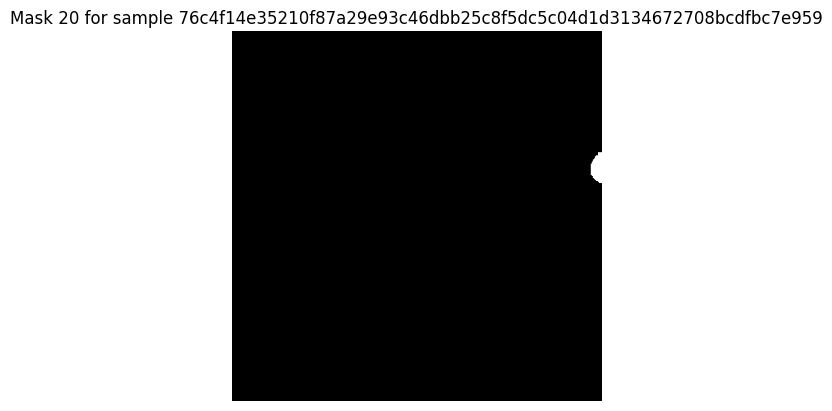

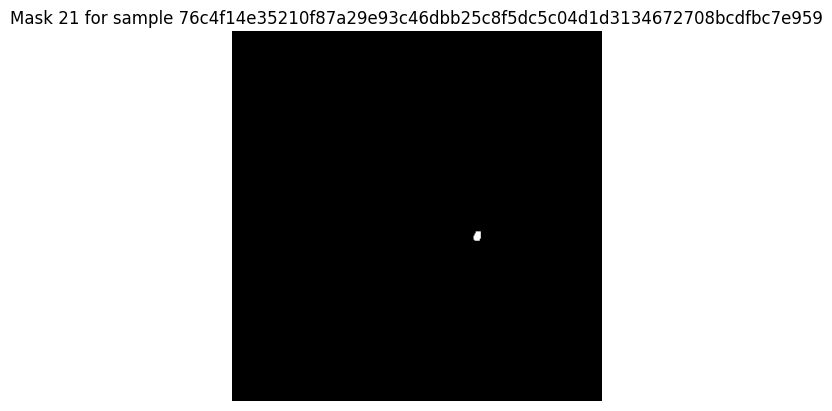

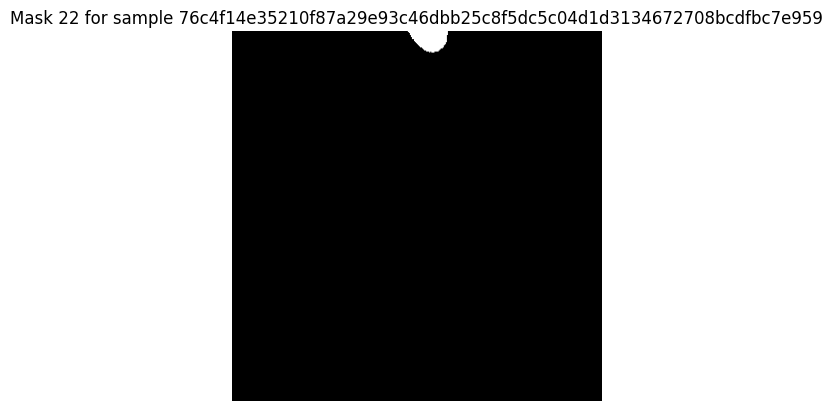

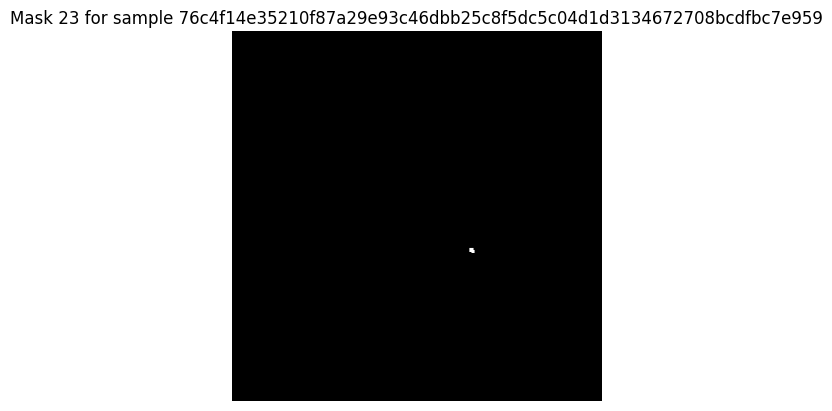

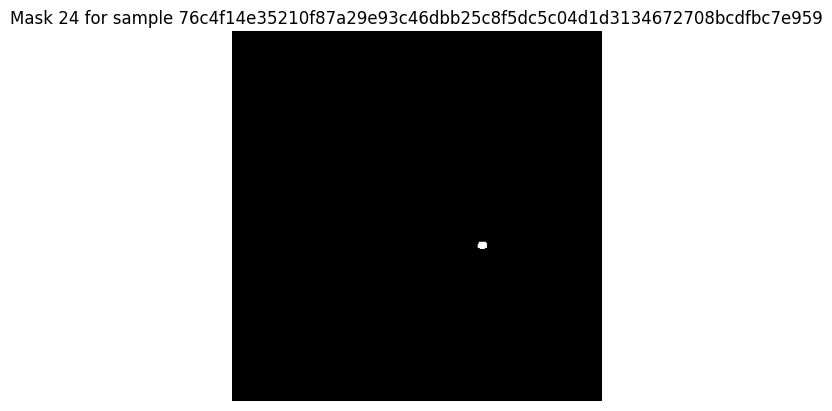

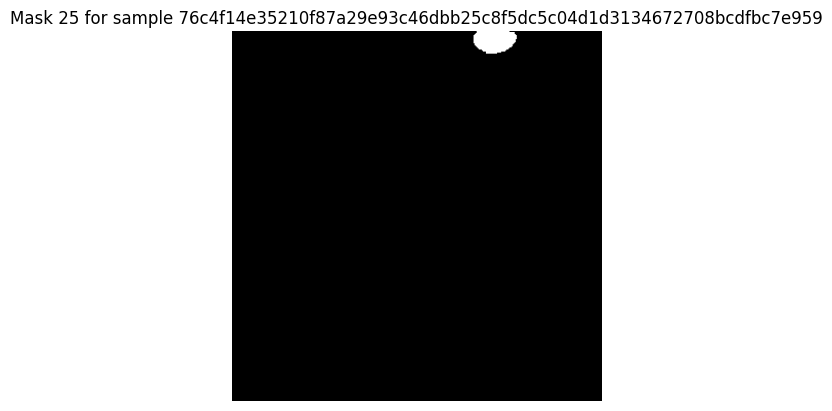

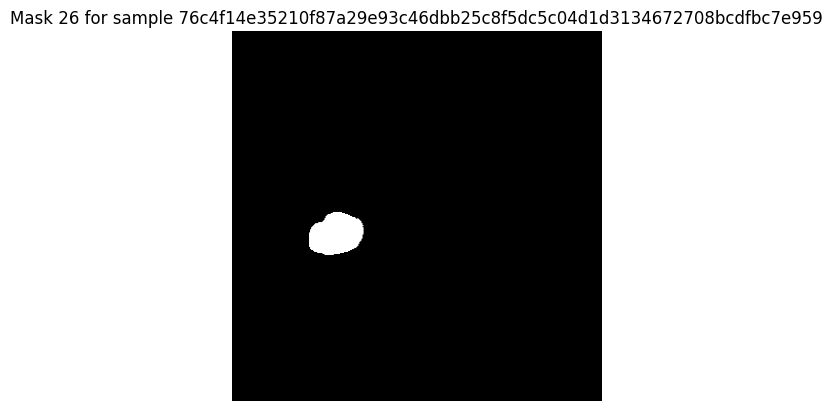

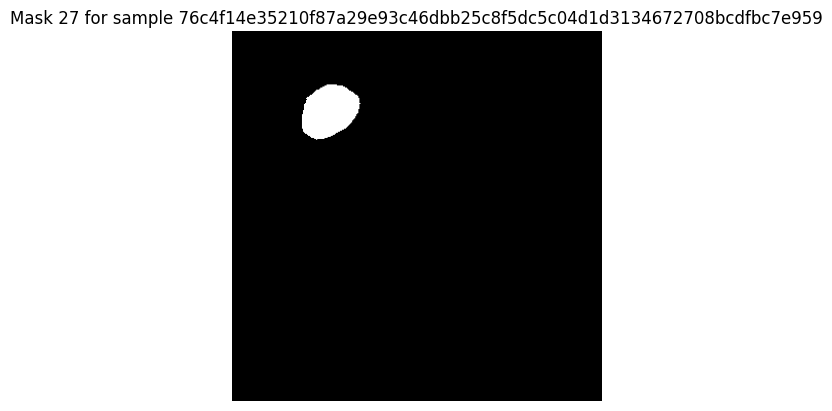

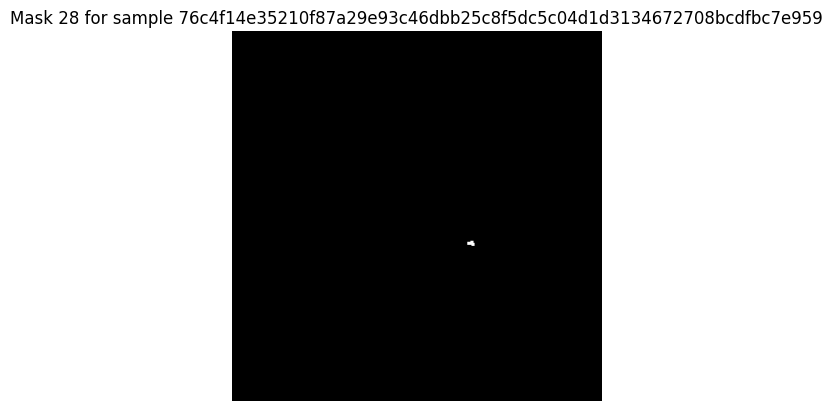

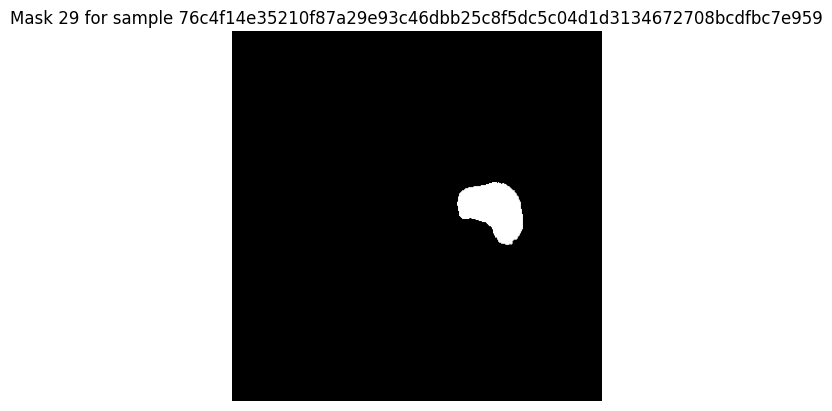

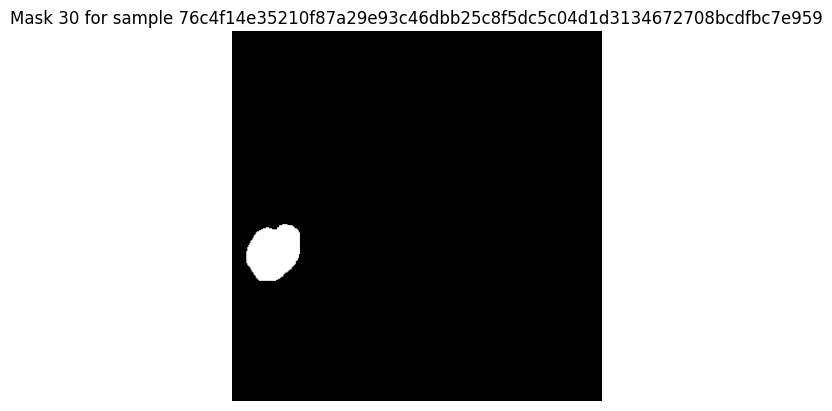

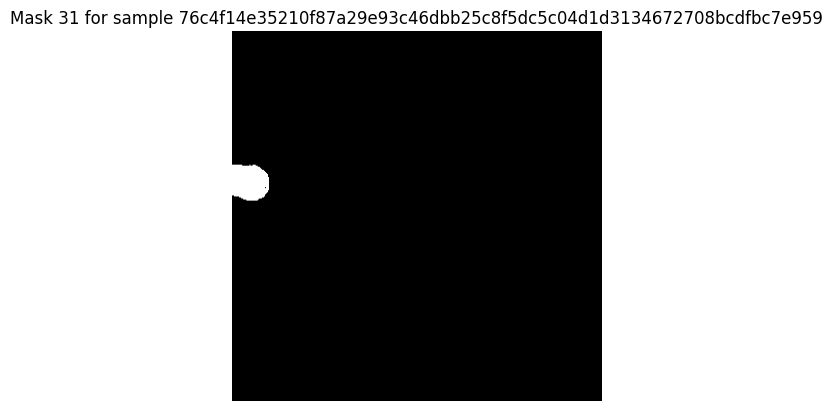

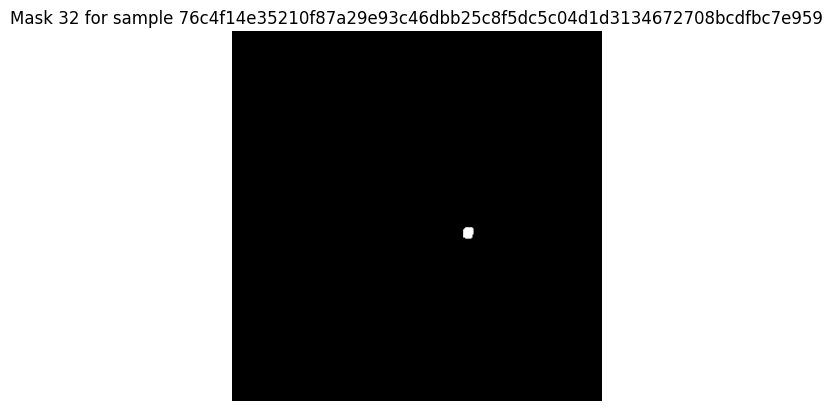

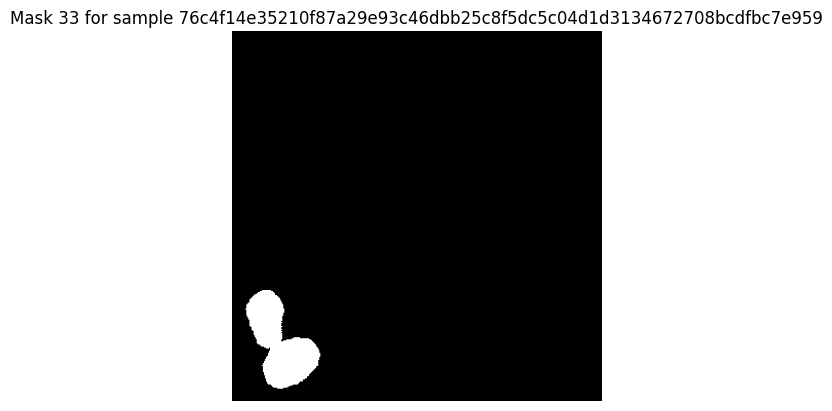

In [13]:
# Example usage:
base_path = '/content/data/toy_data'
images, masks, sample_names = load_data(base_path)

# Access the first sample
first_sample_index = 0
first_sample_name = sample_names[first_sample_index]
first_sample_image = images[first_sample_index]
first_sample_masks = masks[first_sample_index]

# Print the sample name and display the image
print(f'First sample name: {first_sample_name}')
plt.figure()
plt.imshow(first_sample_image)
plt.title(f'Image: {first_sample_name}')
plt.axis('off')
plt.show()

# Display the masks
for i, mask in enumerate(first_sample_masks):
    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask {i + 1} for sample {first_sample_name}')
    plt.axis('off')
    plt.show()

In [14]:
len(masks[3])

48

## **Merge sample masks**

In [60]:
def merge_masks(masks):
    """
    Merge masks by adding the values of corresponding pixels.

    Args:
    - masks (list of numpy arrays): List of masks where each mask is represented as a numpy array.

    Returns:
    - merged_mask (numpy array): Merged mask obtained by adding the values of corresponding pixels in the input masks.
    """
    # Initialize the merged mask with zeros
    merged_mask = np.zeros_like(masks[0], dtype=np.uint8)

    # Add the values of corresponding pixels in each mask
    for mask in masks:
        # Ensure mask is uint8 type
        mask_uint8 = mask.astype(np.uint8)
        merged_mask += mask_uint8

    return merged_mask

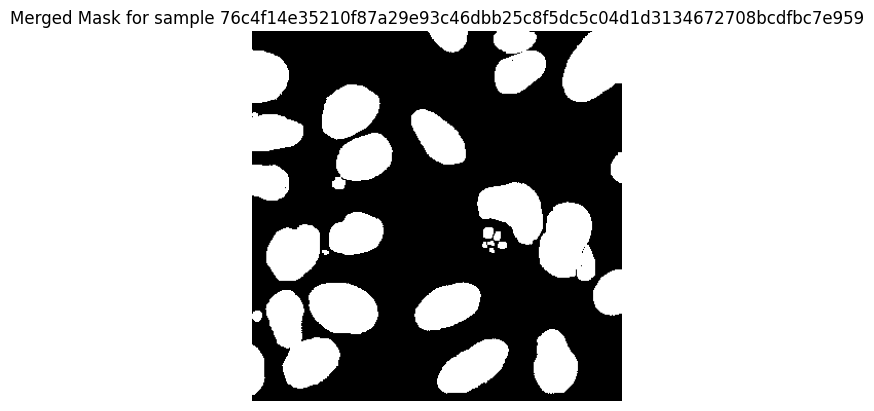

In [16]:
merged_mask = merge_masks(first_sample_masks)

# Display the merged mask
plt.figure()
plt.imshow(merged_mask, cmap='gray')
plt.title(f'Merged Mask for sample {first_sample_name}')
plt.axis('off')
plt.show()

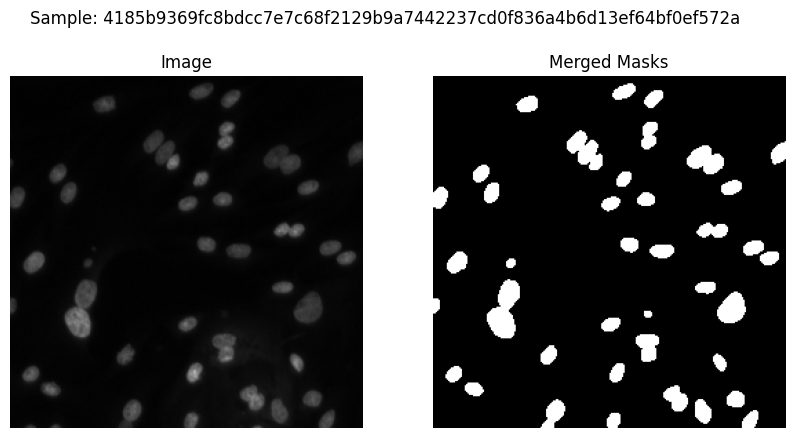

In [17]:
# Choose a sample index to plot
sample_index = 3

# Get sample data
sample_name = sample_names[sample_index]
sample_image = images[sample_index]
sample_masks = masks[sample_index]

# Merge masks
merged_mask = merge_masks(sample_masks)

# Plot the sample with its image and merged masks
plt.figure(figsize=(10, 5))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Image')
plt.axis('off')

# Plot the merged masks
plt.subplot(1, 2, 2)
plt.imshow(merged_mask, cmap='gray')
plt.title('Merged Masks')
plt.axis('off')

plt.suptitle(f'Sample: {sample_name}')
plt.show()

## **Data Preprocessing and Augmentation**

In [64]:
import os
import numpy as np
from PIL import Image

In [65]:
def merge_masks(masks):
    """
    Merge masks by adding the values of corresponding pixels.

    Args:
    - masks (list of numpy arrays): List of masks where each mask is represented as a numpy array.

    Returns:
    - merged_mask (numpy array): Merged mask obtained by adding the values of corresponding pixels in the input masks.
    """
    # Initialize the merged mask with zeros
    merged_mask = np.zeros_like(masks[0], dtype=np.uint8)

    # Add the values of corresponding pixels in each mask
    for mask in masks:
        # Ensure mask is uint8 type
        mask_uint8 = mask.astype(np.uint8)
        merged_mask += mask_uint8

    return merged_mask

In [66]:
def save_merged_mask(merged_mask, sample_folder):
    """
    Save the merged mask as an image file in the 'merged_masks' folder within the sample folder.

    Args:
    - merged_mask (numpy array): Merged mask to be saved.
    - sample_folder (str): Path to the sample folder containing the image and masks.
    """
    # Create the merged_masks directory within the sample folder if it doesn't exist
    merged_masks_dir = os.path.join(sample_folder, 'merged_masks')
    os.makedirs(merged_masks_dir, exist_ok=True)

    # Define the path to save the merged mask
    sample_name = os.path.basename(sample_folder)
    output_path = os.path.join(merged_masks_dir, f"{sample_name}_merged_mask.png")

    # Convert the merged mask to an image
    merged_mask_image = Image.fromarray(merged_mask)

    # Save the image
    merged_mask_image.save(output_path)
    print(f"Merged mask saved at: {output_path}")

In [67]:
def process_and_save_merged_masks(base_path):
    # Load the data
    images, masks, sample_names, sample_folders = load_data(base_path)

    # Iterate through each sample to merge and save masks
    for sample_name, sample_masks, sample_folder in zip(sample_names, masks, sample_folders):
        # Merge the masks for the sample
        merged_mask = merge_masks(sample_masks)

        # Save the merged mask in the corresponding folder
        save_merged_mask(merged_mask, sample_folder)

In [68]:
def load_data(base_path):
    images = []
    masks = []
    sample_names = []
    sample_folders = []

    # Get all sample folders
    sample_folders = [os.path.join(base_path, folder) for folder in os.listdir(base_path)]

    for sample_folder in sample_folders:
        sample_name = os.path.basename(sample_folder)
        image_path = os.path.join(sample_folder, 'images', f'{sample_name}.png')
        masks_path = os.path.join(sample_folder, 'masks')

        # Load the image and stretch contrast
        image = Image.open(image_path)
        image = np.array(image)
        stretched_image = stretch_contrast(image)
        images.append(stretched_image)
        sample_names.append(sample_name)

        # Load all masks for this sample
        mask_files = [os.path.join(masks_path, mask_file) for mask_file in os.listdir(masks_path) if mask_file.endswith('.png')]
        sample_masks = [np.array(Image.open(mask_file).convert('L')) for mask_file in mask_files]
        masks.append(sample_masks)

    return images, masks, sample_names, sample_folders

In [69]:
def stretch_contrast(image):
    """
    Stretch the contrast of an image to utilize the full range of pixel values (0 to 255).

    Args:
    - image (numpy array): Input image represented as a numpy array.

    Returns:
    - stretched_image (numpy array): Image with contrast stretched to utilize the full range of pixel values.
    """
    # Compute the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Stretch the contrast using linear scaling
    stretched_image = (image - min_val) * (255.0 / (max_val - min_val))
    return stretched_image.astype(np.uint8)

In [72]:
base_path = '/content/data/toy_data'
process_and_save_merged_masks(base_path)

Merged mask saved at: /content/data/toy_data/76c4f14e35210f87a29e93c46dbb25c8f5dc5c04d1d3134672708bcdfbc7e959/merged_masks/76c4f14e35210f87a29e93c46dbb25c8f5dc5c04d1d3134672708bcdfbc7e959_merged_mask.png
Merged mask saved at: /content/data/toy_data/e49fc2b4f1f39d481a6525225ab3f688be5c87f56884456ad54c953315efae83/merged_masks/e49fc2b4f1f39d481a6525225ab3f688be5c87f56884456ad54c953315efae83_merged_mask.png
Merged mask saved at: /content/data/toy_data/aa47f0b303b1d525b52452ae3a8553b2d61d719a28aee547e2ef1fc6730a078f/merged_masks/aa47f0b303b1d525b52452ae3a8553b2d61d719a28aee547e2ef1fc6730a078f_merged_mask.png
Merged mask saved at: /content/data/toy_data/4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a/merged_masks/4185b9369fc8bdcc7e7c68f2129b9a7442237cd0f836a4b6d13ef64bf0ef572a_merged_mask.png
Merged mask saved at: /content/data/toy_data/5b0bde771bc67c505d1b59405cbcad0a2766ec3ee4e35852e959552c1b454233/merged_masks/5b0bde771bc67c505d1b59405cbcad0a2766ec3ee4e35852e959552c1b454

In [73]:
!pip install imgaug

In [77]:
import os
import numpy as np
from PIL import Image
import imgaug.augmenters as iaa
import imgaug as ia

In [78]:
def load_image(image_path):
    """
    Load an image from the specified path and return it as a numpy array.
    """
    image = Image.open(image_path)
    return np.array(image)

In [79]:
def save_image(image_array, output_path):
    """
    Save a numpy array as an image to the specified path.
    """
    image = Image.fromarray(image_array)
    image.save(output_path)

In [97]:
def augment_images_and_masks(images, masks, augmenters):
    """
    Apply augmentations to a list of images and masks in a synchronized manner.

    Args:
    - images (list of numpy arrays): List of images to be augmented.
    - masks (list of numpy arrays): List of masks to be augmented.
    - augmenters (iaa.Sequential): Augmentation pipeline.

    Returns:
    - augmented_images (list of numpy arrays): List of augmented images.
    - augmented_masks (list of numpy arrays): List of augmented masks.
    """
    # Convert augmenters to deterministic to ensure the same augmentations are applied to images and masks
    deterministic_augmenters = augmenters.to_deterministic()

    # Apply augmentations
    aug_images = deterministic_augmenters(images=images)
    aug_masks = deterministic_augmenters(images=masks)

    return aug_images, aug_masks

In [102]:
def create_augmented_folder(base_path, sample_name, num_augments=5):
    """
    Create augmented images for a given sample and save them in a new folder.

    Args:
    - base_path (str): Path to the base directory containing images and masks.
    - sample_name (str): Name of the sample to be augmented.
    - num_augments (int): Number of augmented images to generate per sample.
    """
    sample_folder = os.path.join(base_path, sample_name)
    images_path = os.path.join(sample_folder, 'images')
    masks_path = os.path.join(sample_folder, 'masks')

    # Load the image
    image_files = [os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.png')]
    image = load_image(image_files[0])
    images = [image]

    # Load masks
    mask_files = [os.path.join(masks_path, f) for f in os.listdir(masks_path) if f.endswith('.png')]
    masks = [load_image(mask_file) for mask_file in mask_files]

    # Merge masks
    merged_mask = merge_masks(masks)

    # Create augmented folder
    augmented_folder = f"{sample_folder}-augmented"
    os.makedirs(augmented_folder, exist_ok=True)
    augmented_images_folder = os.path.join(augmented_folder, 'images')
    augmented_masks_folder = os.path.join(augmented_folder, 'masks')
    os.makedirs(augmented_images_folder, exist_ok=True)
    os.makedirs(augmented_masks_folder, exist_ok=True)

    # Define augmentation pipeline
    augmenters = iaa.Sequential([
        iaa.Fliplr(0.5),  # horizontal flips
        iaa.Affine(rotate=(-90, 90)),  # random rotations
        iaa.Multiply((0.8, 1.2)),  # random brightness changes
        iaa.LinearContrast((0.75, 1.5)),  # random contrast changes
    ])

    # Generate and save augmented images and masks
    for i in range(num_augments):
        aug_images, aug_masks = augment_images_and_masks(images, [merged_mask], augmenters)
        for j, aug_image in enumerate(aug_images):
            save_image(aug_image, os.path.join(augmented_images_folder, f"{sample_name}_aug_{i}_{j}.png"))
        for j, aug_mask in enumerate(aug_masks):
            save_image(aug_mask, os.path.join(augmented_masks_folder, f"{sample_name}_merged_mask_aug_{i}_{j}.png"))

    print(f"Augmented data saved at: {augmented_folder}")

In [98]:
def load_data(base_path):
    images = []
    masks = []
    sample_names = []
    sample_folders = []

    # Get all sample folders
    sample_folders = [os.path.join(base_path, folder) for folder in os.listdir(base_path)]

    for sample_folder in sample_folders:
        sample_name = os.path.basename(sample_folder)
        image_path = os.path.join(sample_folder, 'images', f'{sample_name}.png')
        masks_path = os.path.join(sample_folder, 'masks')

        # Load the image and stretch contrast
        image = Image.open(image_path)
        image = np.array(image)
        stretched_image = stretch_contrast(image)
        images.append(stretched_image)
        sample_names.append(sample_name)

        # Load all masks for this sample
        mask_files = [os.path.join(masks_path, mask_file) for mask_file in os.listdir(masks_path) if mask_file.endswith('.png')]
        sample_masks = [np.array(Image.open(mask_file).convert('L')) for mask_file in mask_files]
        masks.append(sample_masks)

    return images, masks, sample_names, sample_folders

In [88]:
def stretch_contrast(image):
    """
    Stretch the contrast of an image to utilize the full range of pixel values (0 to 255).

    Args:
    - image (numpy array): Input image represented as a numpy array.

    Returns:
    - stretched_image (numpy array): Image with contrast stretched to utilize the full range of pixel values.
    """
    # Compute the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Stretch the contrast using linear scaling
    stretched_image = (image - min_val) * (255.0 / (max_val - min_val))
    return stretched_image.astype(np.uint8)

In [103]:
base_path = '/content/data/toy_data'
sample_name = '19f0653c33982a416feed56e5d1ce6849fd83314fd19dfa1c5b23c6b66e9868a'
create_augmented_folder(base_path, sample_name, num_augments=5)

Augmented data saved at: /content/data/toy_data/19f0653c33982a416feed56e5d1ce6849fd83314fd19dfa1c5b23c6b66e9868a-augmented
